In [1]:
%matplotlib inline
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
import IMA2


def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))


/usr/local/lib/python3.4/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
#definition du nombre d'images et lecture du header pour vérifier temps de pose
N=5
hdu=fits.getheader('bleu_11.fits')


675.659


(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.76974418e-07,   2.38487209e-07,   1.07319244e-06,
          1.78865407e-06,   3.10033372e-06,   5.36596220e-06,
          1.07319244e-05,   2.07483872e-05,   3.12418244e-05,
          7.05922138e-05,   1.05530590e-04,   1.81965740e-04,
          3.02521024e-04,   4.67673417e-04,   7.54931260e-04,
          1.16012103e-03,   1.76897887e-03,   3.06670702e-03,
          3.91464829e-03,   5.33960936e-03,   7.30259758e-03,
          9.48272840e-03,   1.22714786e-02,   1.50790692e-02,
          2.00723952e-02,   2.18470977e-02,   2.53206639e-02,
          2.75582702e-02,   2.96424099e-02,   3.10817994e-02,
          3.24614479e-02,   3.18592677e-02,   3.10772682e-02,
          3.01069830e-02,   2.74186359e-02,   2.39344570e-02,
          2.12288197e-02,   1.79492628e-02,   1.50769229e-02,
          1.20743689e-02,   9.68711194e-03,   7.95116354e-03,
          5.82075731e-03,   4.30946386e-03,   3.17641113e-03,
        

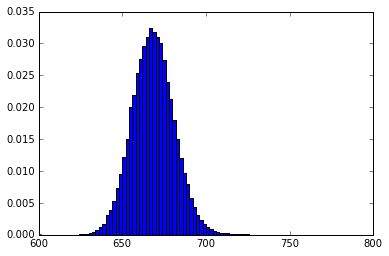

In [15]:

#Lecture des dark et calcul médiane, moyenne et std
darkn=[]
for x in range(1,N+1):
    dark=fits.getdata('dark5_'+str(x)+'.fits')
    darkn.append(dark)
    

cube=np.array(darkn)

#for x in range(0, len(darkn)):
 #   plt.figure()
  #  plt.hist(darkn[x].flatten(),bins=100, normed=True, range=(0,1000))

dark_m=np.mean(cube, axis=0)
dark_med=np.median(cube, axis=0)
dark_std=np.std(cube,axis=0)
#On utilisera la moyenne du dark_med pour le bruit
print(np.mean(dark_med))

plt.hist(dark_med.flatten(), normed=True, bins=100, range=(600,800) )

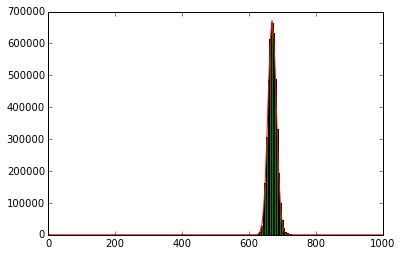

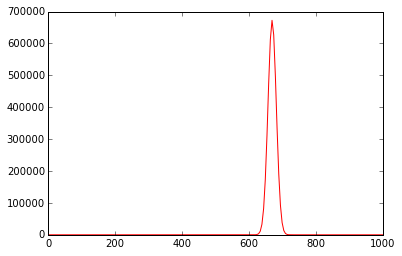

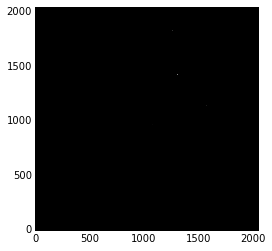

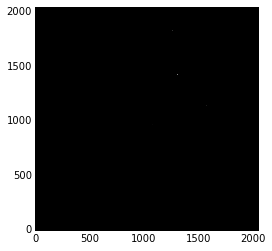

In [4]:
#Ajustement d'une gaussienne sur le dark median et affichage d'un dark et du dark median

a= dark_med.clip(600,750)
(mean, sigma) = norm.fit(a.flatten())
n , bins, patches = plt.hist(dark_med.flatten(), bins=200, range=(0,1000) , histtype='bar' )
x = np.linspace(bins[0], bins[-1], 200)
popt, pcov = curve_fit(Gauss, x, n, p0=[max(n), np.mean(dark_med), np.std(dark_med)])

plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
plt.hist(dark_med.flatten(), bins=200, range=(0,1000) , histtype='bar' )
plt.figure()
plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
plt.figure()

plt.imshow(darkn[0], cmap='gray', origin='lower',vmin=1800, vmax=2200)
plt.figure()
plt.imshow(dark_med, cmap='gray', origin='lower',vmin=1800, vmax=2200)

34647.7 36058.0 1531.63
34726.7 36097.0 1499.4
34858.2 36162.0 1441.89
34768.9 36118.0 1482.66
34980.8 36214.0 1384.1
34682.2


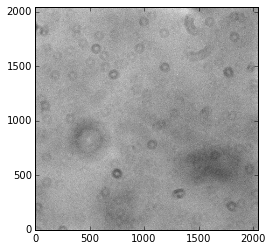

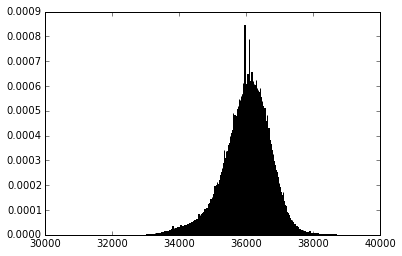

In [16]:
#lecture des flats, calcul moyenne, médiane, std et affichage d'un des flats
flatn=[]
for x in range(1,N+1):
    flat=fits.getdata('flatbleu_'+str(x)+'.fits')
    print(np.mean(flat), np.median(flat), np.std(flat))
    flatn.append(flat)
    

cube=np.array(flatn)
flat_m=np.mean(cube, axis=0)
flat_med=np.median(cube, axis=0)
flat_std=np.std(cube,axis=0)
#On utilisera cette valeur pour le calcul du bruit
print(np.mean(flat_med))

plt.imshow(flatn[0], cmap='gray', origin='lower',vmin=30000, vmax=40000)
plt.figure()
histogram=plt.hist(flatn[0].flatten(),bins=1000, histtype='bar', normed=True, range=(30000,40000))

[ 104213.31863288   36091.09296134     623.70163045]


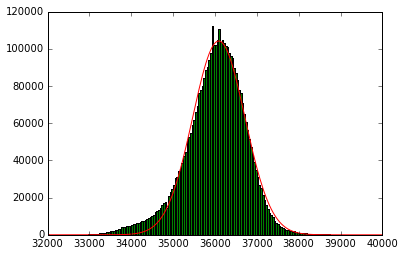

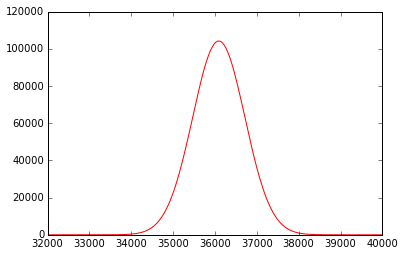

In [6]:
#Ajustement d'une gaussienne sur un des flats
a= flatn[0].clip(32000,400000)
(mean, sigma) = norm.fit(a.flatten())
n , bins, patches = plt.hist(flatn[0].flatten(), bins=200, range=(32000,40000) , histtype='bar' )
x = np.linspace(bins[0], bins[-1], 200)
popt, pcov = curve_fit(Gauss, x, n, p0=[max(n), np.mean(flatn[0]), np.std(flatn[0])])

plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
plt.hist(flatn[0].flatten(), bins=200, range=(32000,40000) , histtype='bar' )
plt.figure()
plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
print(popt)

752.422 723.0 386.795
749.308 720.0 392.503
748.483 720.0 387.466
749.582 721.0 386.315
749.332 720.0 388.373


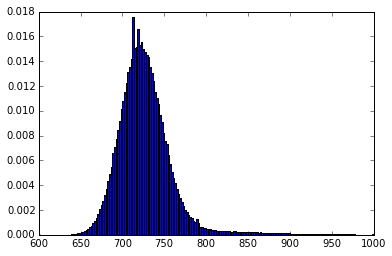

In [14]:
#Lecture des images, calcul médiane, moyenne, std et histogrammes
imgn=[]
for x in range(1,N+1):
    imag=fits.getdata('bleu_1'+str(x)+'.fits')
    print(np.mean(imag), np.median(imag), np.std(imag))
    imgn.append(imag)
    

cube=np.array(imgn)
img_m=np.mean(cube, axis=0)
img_med=np.median(cube, axis=0)
img_std=np.std(cube,axis=0)

plt.figure()
histogram=plt.hist(imgn[0].flatten(),bins=200, histtype='bar', normed=True, range=(600,1000))

#plt.figure()
#histogram=plt.hist(imgn[1].flatten(),bins=200, histtype='bar', normed=True, range=(600,1000))

#plt.figure()
#histogram=plt.hist(imgn[2].flatten(),bins=200, histtype='bar', normed=True, range=(600,1000))

#plt.figure()
#histogram=plt.hist(imgn[3].flatten(),bins=200, histtype='bar', normed=True, range=(600,1000))

#plt.figure()
#histogram=plt.hist(imgn[4].flatten(),bins=200, histtype='bar', normed=True, range=(600,1000))

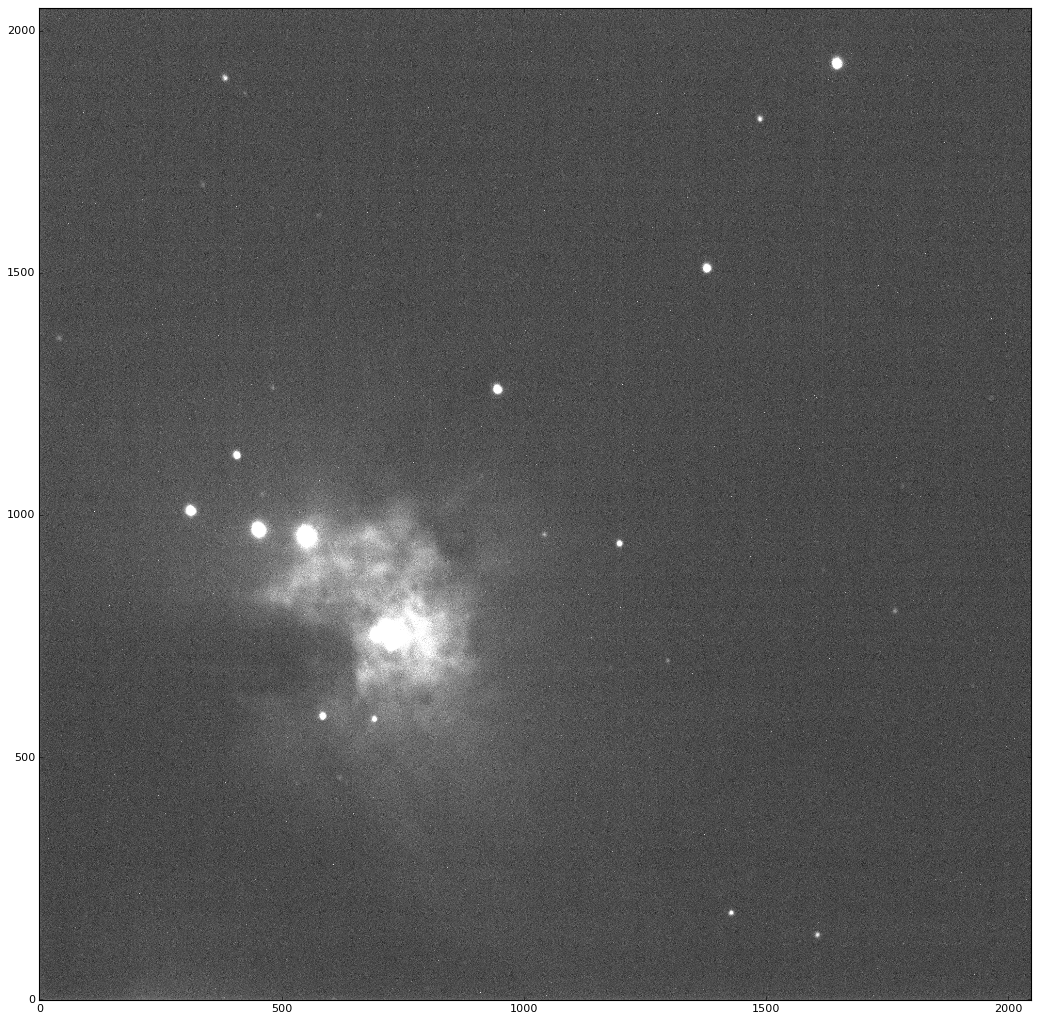

In [8]:
#Affichage d'une image parce que c'est joli quand même
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(imgn[0], cmap='gray', origin='lower',vmin=600, vmax=1000)

In [9]:
#Affichage des images pour vérification
#plt.figure()
#plt.imshow(imgn[1], cmap='gray', origin='lower',vmin=600, vmax=1000)
#plt.figure()
#plt.imshow(imgn[2], cmap='gray', origin='lower',vmin=600, vmax=1000)
#plt.figure()
#plt.imshow(imgn[3], cmap='gray', origin='lower',vmin=600, vmax=1000)
#plt.figure()
#plt.imshow(imgn[4], cmap='gray', origin='lower',vmin=600, vmax=1000)

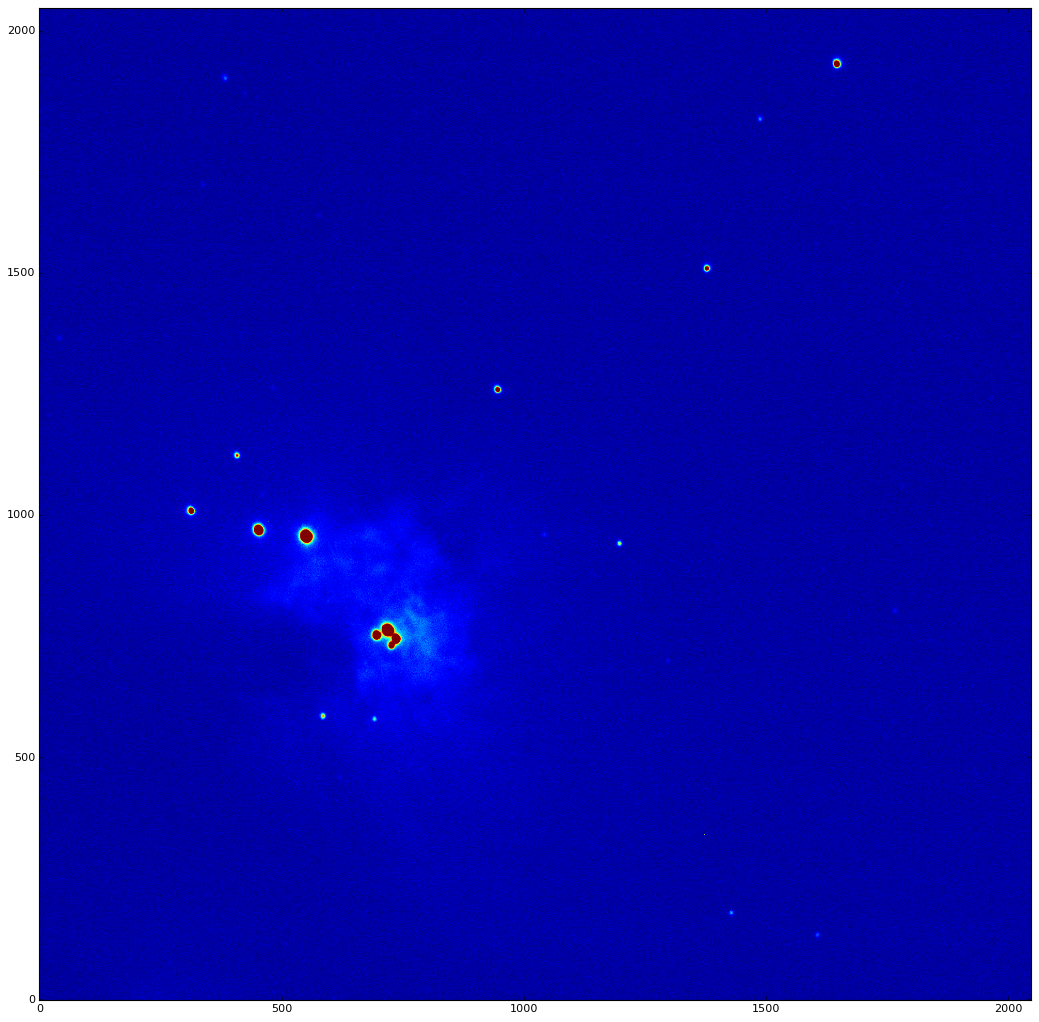

In [10]:
#Image traitée
image_red=(imgn[0]-dark_med)/((flat_med-dark_med)/(np.mean(flat_med-dark_med)))
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.imshow(image_red, cmap='jet', origin='lower',vmin=0, vmax=1500)

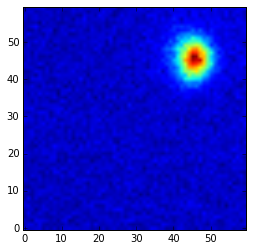

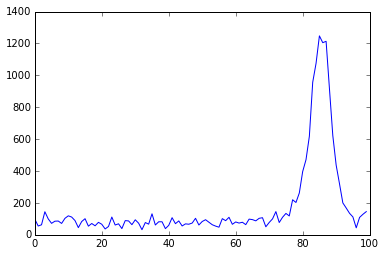

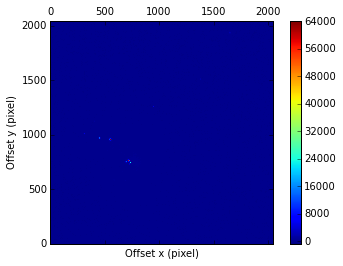

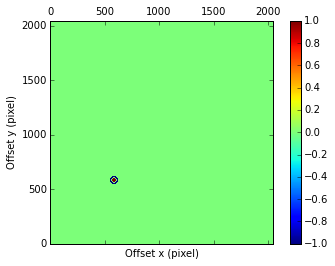

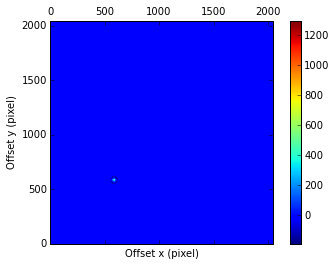

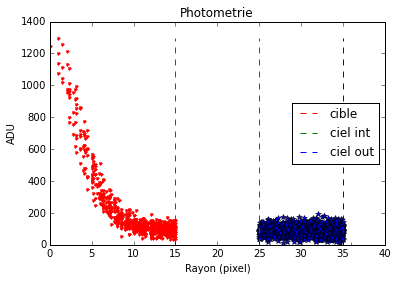

Aires analysées : centre :  709  pixels ; couronne :  1892  pixels
Intensité mesurée :  88225.0962771  ADU
Intensité de la cible :  216.651952574  ADU/pixel ; Intensité du fond :  92.2159916755  ADU/pixel


[88225.096277087738, 88225.096277087738, -12.363980352408159]

In [11]:

plt.imshow(image_red[540:600,540:600], cmap='jet', origin='lower')
plt.figure()
plt.plot(image_red[585, 500:600])
plt.figure()
IMA2.photometrie(image_red,[585,585],15,25,35)

q27: Ce profil présente un pic -une gaussienne-, à cause du traitement fait précédemment, on a un contraste élevé entre l'objet (pixel très éclairé, donc forte valeurs) et le fond très sombre (proche de 0).
On va mesurer le flux de l'étoile sur cette gaussienne, pour avoir 99% du flux à 5sigma.

q28: Plus on augmente le rayon de l'objet à étudier plus on prend en compte du flux, mais on prend aussi en compte du bruit sur les bords.
Les rayons de cielint et cielout permettent d'établir les zones d'analyses du bruit du ciel et la zone de transition(cielint) entre le ciel et l'étoile.

q29: Non le ciel n'est pas noir, et on peut donc lui soustraire sa constribution. Le ciel diminue le SNR.

q30:  Les bruits sur un pixel proviennent du ciel, du dark comprenant le bruit de lecture et l'offset et du bruit du flux de photons. 

q31: $$SNR = \frac{flux_{etoile}}{\sqrt{\sigma_{lec}^2 + \sigma_{flat}^2 + \sigma_{offset}^2 + flux_{ciel} + flux_{etoile}}}$$

q32: Meilleur est le seeing, plus grand sera le SNR (on aura une meilleure image de l'objet).

q33: Pour pouvoir évaluer la contribution du ciel (son flux) sur l'image et ainsi pouvoir le soustraire.

q34: Pour les composantes du bruit on prendra les valeurs de la médiane du dark comprenant l'offset et le bruit de lecture ainsi: $\sigma_{dark}^2=675^2$
$\sigma_{flat}^2=34682^2$
En prenant le $flux_{ciel}$ la valeur lu sur la courbe ~ 100 .


On a donc, SNR= 2.54

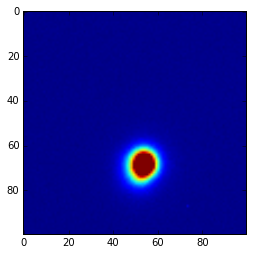

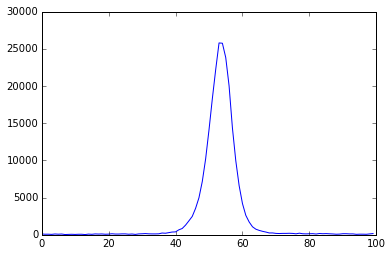

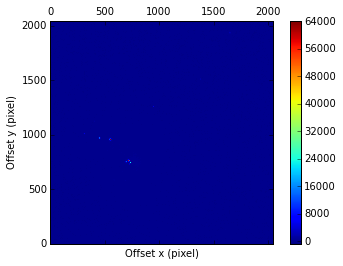

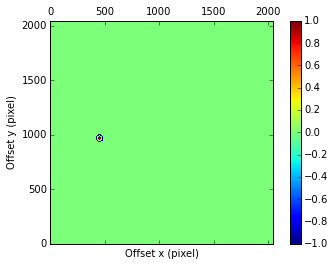

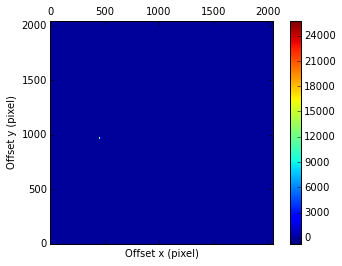

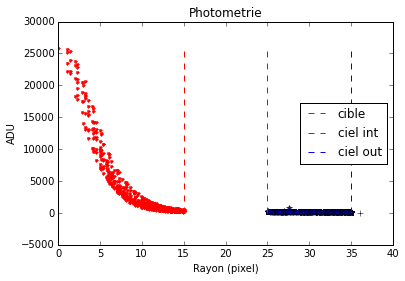

Aires analysées : centre :  709  pixels ; couronne :  1891  pixels
Intensité mesurée :  2347774.79745  ADU
Intensité de la cible :  3429.98730606  ADU/pixel ; Intensité du fond :  118.222740944  ADU/pixel


[2347774.7974451347, 2347774.7974451347, -15.926641090768678]

In [12]:
plt.imshow(image_red[900:1000,400:500], cmap='jet', vmin=0, vmax=10000)

plt.figure()
plt.plot(image_red[968, 400:500])
IMA2.photometrie(image_red,[453,968],15,25,35)

On a donc, SNR= 67.61 avec $flux_{ciel} \approx 120$

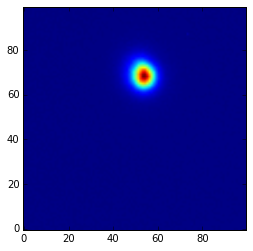

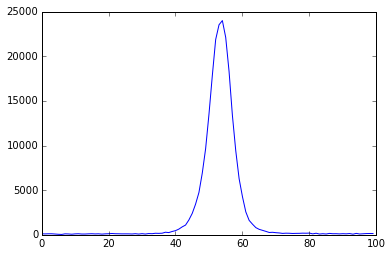

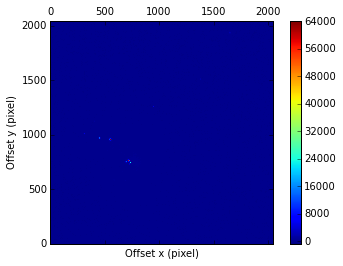

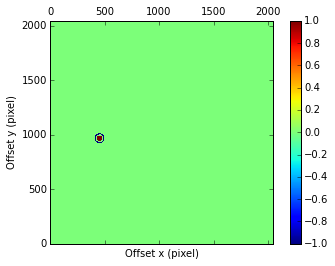

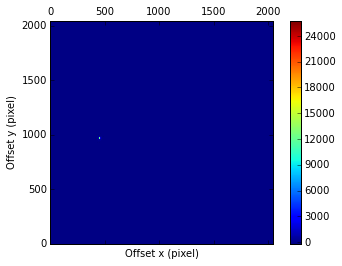

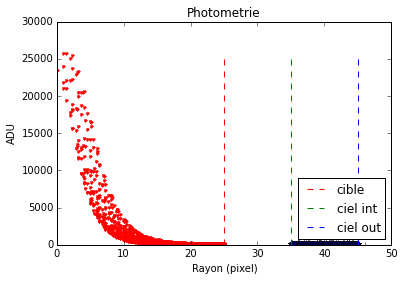

Aires analysées : centre :  1961  pixels ; couronne :  2508  pixels
Intensité mesurée :  2460005.96666  ADU
Intensité de la cible :  1359.16585926  ADU/pixel ; Intensité du fond :  104.700807416  ADU/pixel


[2460005.9666566984, 2460005.9666566984, -15.977340401176065]

In [13]:

plt.imshow(image_red[900:1000,400:500], cmap='jet', origin='lower')
plt.figure()
plt.plot(image_red[967, 400:500])
IMA2.photometrie(image_red,[453,967],25,35,45)

On a donc, SNR=70.08 avec $flux_{ciel} \approx 110$